<a href="https://colab.research.google.com/github/Angepira/AngePira.github.io/blob/main/Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar spark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.2.3-bin-hadoop3.2.tgz

In [ ]:

import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop3.2"



In [ ]:
!pip install -q findspark

In [ ]:

!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
#crear sesion
import findspark

findspark.init()

import pyspark

from pyspark.sql.functions import *

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()



# Cargar los datos

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, DateType,BooleanType

In [ ]:
df_schema = StructType(fields=[StructField('video_id',StringType(),False),
                        StructField('trending_date',StringType(),False),
                        StructField('title',StringType(),False),
                        StructField('channel_title',StringType(),False),
                        StructField('category_id',IntegerType(), False),
                        StructField('publish_time',StringType(), False),
                        StructField('tags',StringType(),False),
                        StructField('views',IntegerType(), False),
                        StructField('likes',IntegerType(), False),
                        StructField('dislikes',IntegerType(), False),
                        StructField('comment_count',IntegerType(), False),
                        StructField('thumbnail_link',StringType(),False),
                        StructField('comments_disabled',BooleanType(), False),
                        StructField('ratings_disabled', BooleanType(), False),
                        StructField('video_error_or_removed',BooleanType(), False),
                        StructField('description',StringType(),False)])

In [ ]:
dfmex = spark.read.option('header',True).schema(df_schema).csv('./drive/MyDrive/MXvideos.csv')

In [ ]:
dfmex.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: integer (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: boolean (nullable = true)
 |-- video_error_or_removed: boolean (nullable = true)
 |-- description: string (nullable = true)



In [ ]:
dfmex.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views|likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|SbOwzAl9ZfQ|     17.14.11|Capítulo 12 | Mas...|     MasterChef 2017|         24|2017-11-13T06:06:...|"MasterChef Junio...| 310130| 4182|     361|         1836|https://i.ytimg.c...|            false|           false| 

In [ ]:
dfmex.count()

43819

In [ ]:
import datetime

In [ ]:
def clean_trending_date(date_str):
  try:
    return datetime.datetime.strptime(date_str,'%y.%d.%m').date()
  except (ValueError,TypeError):
    return None

In [ ]:
spark.udf.register('clean_trending_date', clean_trending_date, DateType())

<function __main__.clean_trending_date(date_str)>

In [ ]:
dfmexc = dfmex.selectExpr('video_id','clean_trending_date(trending_date) as trending_date', 'title','category_id','tags','views', 'likes', 'dislikes', 'comment_count','comments_disabled','ratings_disabled','video_error_or_removed')\
                    .filter('trending_date iS not null' )


In [ ]:
dfmexc.show()

+-----------+-------------+--------------------+-----------+--------------------+-------+-----+--------+-------------+-----------------+----------------+----------------------+
|   video_id|trending_date|               title|category_id|                tags|  views|likes|dislikes|comment_count|comments_disabled|ratings_disabled|video_error_or_removed|
+-----------+-------------+--------------------+-----------+--------------------+-------+-----+--------+-------------+-----------------+----------------+----------------------+
|SbOwzAl9ZfQ|   2017-11-14|Capítulo 12 | Mas...|         24|"MasterChef Junio...| 310130| 4182|     361|         1836|            false|           false|                 false|
|klOV6Xh-DnI|   2017-11-14|ALEXA EX-INTEGRAN...|         22|     La Voz Mexico 7| 104972|  271|     174|          369|            false|           false|                 false|
|6L2ZF7Qzsbk|   2017-11-14|LOUIS CKAGÓ - EL ...|         25|"Chumel Torres|""...| 136064|10105|     266|          6

In [ ]:
dfmexc.sort('title').show()

+-----------+-------------+--------------------+-----------+--------------------+------+-----+--------+-------------+-----------------+----------------+----------------------+
|   video_id|trending_date|               title|category_id|                tags| views|likes|dislikes|comment_count|comments_disabled|ratings_disabled|video_error_or_removed|
+-----------+-------------+--------------------+-----------+--------------------+------+-----+--------+-------------+-----------------+----------------+----------------------+
|G7AObDI1spM|   2018-02-02| Es admirable que...|         17|"Lucha Libre|""Es...|  6060|   90|      16|           30|            false|           false|                 false|
|LdVz9faCRJM|   2018-03-09| Fantasma, no nec...|         17|"Lucha Libre|""Es...|  5186|   25|       4|            2|            false|           false|                 false|
|CFeQsN-R9og|   2018-05-11| Me La Jugué con ...|         17|"lupita gonzalez|...|  9573|   77|       1|           17|   

In [ ]:
dfmexc.count()

40451

In [ ]:
dfmexc.describe().show()

+-------+-----------+--------------------+-----------------+--------------------+------------------+------------------+------------------+------------------+
|summary|   video_id|               title|      category_id|                tags|             views|             likes|          dislikes|     comment_count|
+-------+-----------+--------------------+-----------------+--------------------+------------------+------------------+------------------+------------------+
|  count|      40451|               40451|            40451|               40451|             40451|             40451|             40451|             40451|
|   mean|       null|                 2.0|21.00313960099874|              2018.0| 342381.9681590072|15861.837432943561| 747.1603915848805| 2039.660008405231|
| stddev|       null|                null|5.878995317224074|                 0.0|1714690.6809946825| 81089.86914970551|10953.576599076014|13938.031796901925|
|    min|     #NAME?| Es admirable que...|          

In [ ]:
dfmexc.filter(dfmexc['video_id']=='#NAME?').count()

516

In [ ]:
dfmexc.filter((dfmexc['comments_disabled']==True) | (dfmexc['ratings_disabled']==True) ).count()

938

In [ ]:
dfmexc.filter(dfmexc['ratings_disabled']==True).count()

634

In [ ]:
dfmexc = dfmexc.filter(dfmexc['comments_disabled']==False).filter(dfmexc['ratings_disabled']==False).toPandas()

In [ ]:
dfmexc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39513 entries, 0 to 39512
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                39513 non-null  object
 1   trending_date           39513 non-null  object
 2   title                   39513 non-null  object
 3   category_id             39513 non-null  int32 
 4   tags                    39513 non-null  object
 5   views                   39513 non-null  int32 
 6   likes                   39513 non-null  int32 
 7   dislikes                39513 non-null  int32 
 8   comment_count           39513 non-null  int32 
 9   comments_disabled       39513 non-null  bool  
 10  ratings_disabled        39513 non-null  bool  
 11  video_error_or_removed  39513 non-null  bool  
dtypes: bool(3), int32(5), object(4)
memory usage: 2.1+ MB


Visualización

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

<ipython-input-31-96c21b066993>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfmexc.corr())


<Axes: >

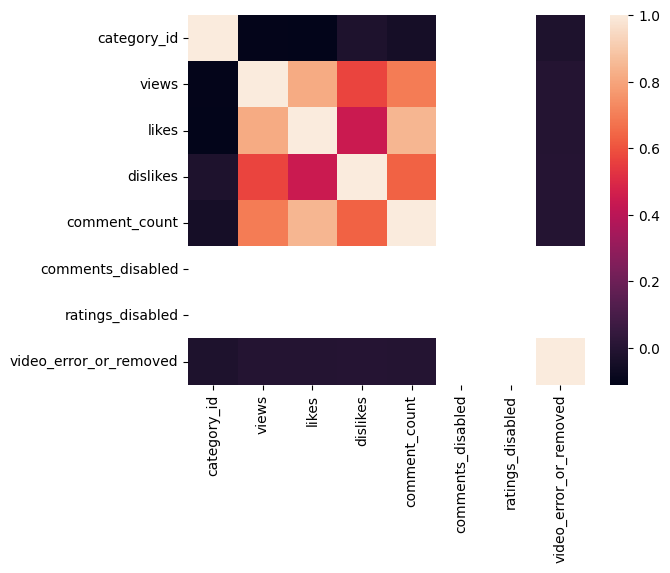

In [ ]:
sns.heatmap(dfmexc.corr())

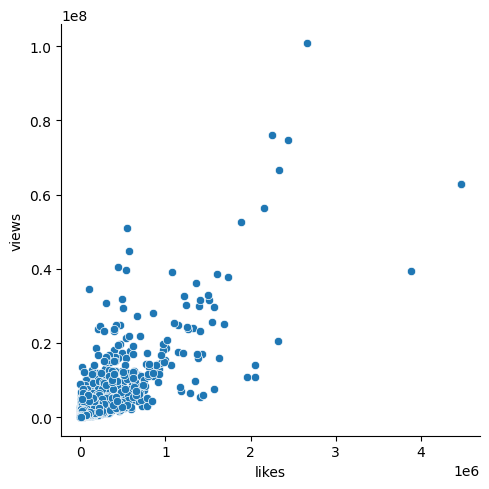

In [ ]:
sns.relplot(data=dfmexc, x='likes', y='views')

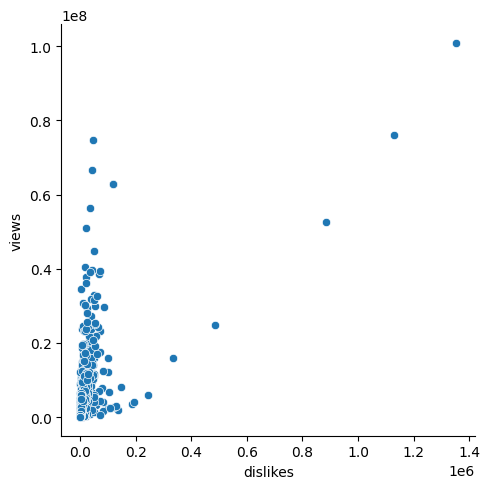

In [ ]:
sns.relplot(data=dfmexc, x='dislikes', y='views')

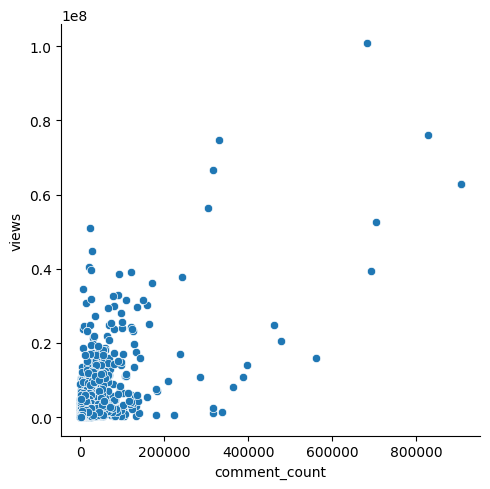

In [ ]:
#comment_count
sns.relplot(data=dfmexc, x='comment_count', y='views')

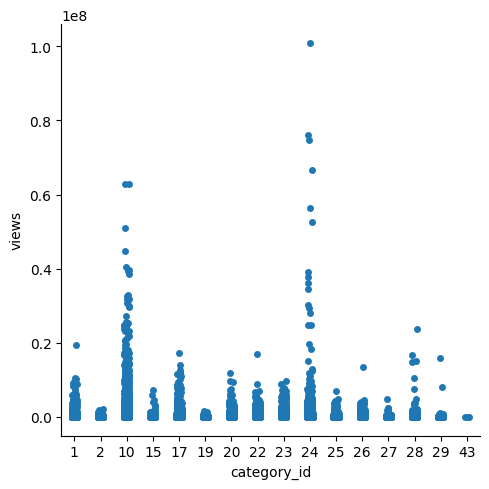

In [ ]:
sns.catplot(data=dfmexc, x='category_id', y='views')

<ipython-input-35-52d513e7f521>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dfmexc.drop(['video_id', 'video_error_or_removed','title','tags'],1).hist()


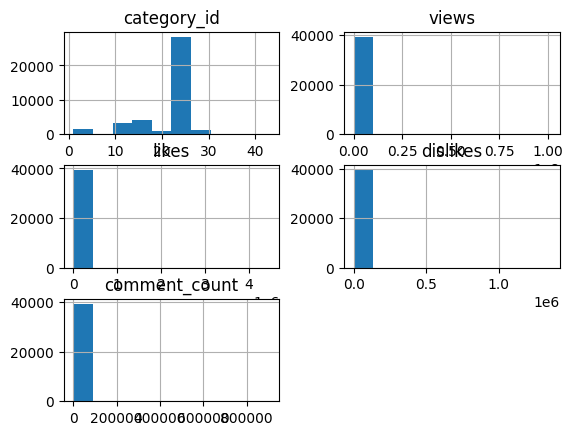

In [ ]:
dfmexc.drop(['video_id', 'video_error_or_removed','title','tags'],1).hist()
plt.show();

In [ ]:
display(dfus)

DataFrame[video_id: string, trending_date: string, title: string, channel_title: string, category_id: int, publish_time: string, tags: string, views: int, likes: int, dislikes: int, comment_count: int, thumbnail_link: string, comments_disabled: boolean, ratings_disabled: boolean, video_error_or_removed: boolean, description: string]

In [ ]:
dfus.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            false|           fal

In [ ]:
dfmex.count()

43819

In [ ]:
dfmex = spark.read.option('header',True).schema(df_schema).csv('./drive/MyDrive/MXvideos.csv')

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [ ]:
sns.heatmap(df.corr())

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X=

y=

SyntaxError: ignored

In [ ]:
#Crear datasets de train y test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=40)

In [ ]:
#Instanciamos el modelo
reg = linear_model.LinearRegression()

In [ ]:
#Entrenamos el modelo
reg.fit(X_train,y_train)I

In [ ]:
#se hace la predicción
y_pred = reg.predict(X_test)